*Project Goal: Can machine learning produce higher returns while investing in Marketplace loans.*

**Marketplace Lending Project: Part 1 -  Overview and Data Discovery**

 - Marketplace Lending landscape 
 - Data Discovery
 - Data Cleaning
 - Featured Engineering
 - Exploratory Data Analysis (EDA)
 - EDA: Conclusion

**Marketplace Lending Project: Part 2 - Building The Machine Learning Model**

 - Data prepocessing
 - Dealing with an imbalanced dataset  
 - Building the model
 - Evaluating the model
 - Month by month model training and prediction
 - Month by month evaluating
 
**Marketplace Lendingg Project: Part 3 - Time Simulation**

- Coming soon

**Marketplace Lending Project: Part 4 - Proeject Review and Whats Next**

- Coming soon


### Marketplace Lending landscape:

Marketplace lending is becoming increasingly popular for small business and consumers to procure loans at lower interest rates compared to credit cards, payday loans, and other alternatives. Peer to peer lending can offer a higher return for non-accredited investors than fixed income investments. This project looks at Lending Club who has been lending since 2007. Lending Club offers loans with various grades and assigns a corresponding interest rate for investors. The higher the interest rate, the riskier the grade. The risk comes in the form of defaults. The goal of this project is to predict the default rate of a loans across all grades using machine learning models. By accurately predicting if a loan will default a significantly higher return can be achieved for an investor.


### Data Discovery:

Lending club offers a subset of their data to the public with over 129 fields for each loan originated. However, not all of the fields are useful for the machine learning model, like keys and ids. Also, several fields can be used by the model to infer if the loan has been paid in full or has already defaulted. For example, investment outstanding will show that the loan has defaulted because all loans that have been fully paid will have an outstanding balance of zero. 

Link to data and data dictionary

Link: https://www.lendingclub.com/info/download-data.action

We begin my importing all data into a pandas dataframe.

In [8]:
import pandas as pd
import numpy as np

In [9]:
#import CSV locations

#2007-2011
csv_2007_2011 = "../peer_to_peer_project/raw_data/lc_rawdata_2007-2011.csv"
#2012-2013
csv_2012_2013 = "../peer_to_peer_project/raw_data/lc_rawdata_2012-2013.csv"
#2014
csv_2014 = "../peer_to_peer_project/raw_data/lc_rawdata_2014.csv"
#2015
csv_2015 = "../peer_to_peer_project/raw_data/lc_rawdata_2015.csv"
#2016
csv_2016Q1 = "../peer_to_peer_project/raw_data/lc_rawdata_2016Q1.csv"
csv_2016Q2 = "../peer_to_peer_project/raw_data/lc_rawdata_2016Q2.csv"
csv_2016Q3 = "../peer_to_peer_project/raw_data/lc_rawdata_2016Q3.csv"
csv_2016Q4 = "../peer_to_peer_project/raw_data/lc_rawdata_2016Q4.csv"
#2017
csv_2017Q1 = "../peer_to_peer_project/raw_data/lc_rawdata_2017Q1.csv"
csv_2017Q2 = "../peer_to_peer_project/raw_data/lc_rawdata_2017Q2.csv"
csv_2017Q3 = "../peer_to_peer_project/raw_data/lc_rawdata_2017Q3.csv"
csv_2017Q4 = "../peer_to_peer_project/raw_data/lc_rawdata_2017Q4.csv"
#2018
csv_2018Q1 = "../peer_to_peer_project/raw_data/lc_rawdata_2018Q1.csv"
csv_2018Q2 = "../peer_to_peer_project/raw_data/lc_rawdata_2018Q2.csv"
csv_2018Q3 = "../peer_to_peer_project/raw_data/lc_rawdata_2018Q3.csv"

#import CSV as pandas data frames

#2007-2011
df_2007_2011 = pd.read_csv(csv_2007_2011, skiprows=1, parse_dates=True)
#2012-2013
df_2012_2013 = pd.read_csv(csv_2012_2013, skiprows=1, parse_dates=True)
#2014
df_2014 = pd.read_csv(csv_2014, skiprows=1, parse_dates=True)
#2015
df_2015 = pd.read_csv(csv_2015, skiprows=1, parse_dates=True)
#2016
df_2016Q1 = pd.read_csv(csv_2016Q1, skiprows=1, parse_dates=True)
df_2016Q2 = pd.read_csv(csv_2016Q2, skiprows=1, parse_dates=True)
df_2016Q3 = pd.read_csv(csv_2016Q3, skiprows=1, parse_dates=True)
df_2016Q4 = pd.read_csv(csv_2016Q4, skiprows=1, parse_dates=True)
#2017
df_2017Q1 = pd.read_csv(csv_2017Q1, skiprows=1, parse_dates=True)
df_2017Q2 = pd.read_csv(csv_2017Q2, skiprows=1, parse_dates=True)
df_2017Q3 = pd.read_csv(csv_2017Q3, skiprows=1, parse_dates=True)
df_2017Q4 = pd.read_csv(csv_2017Q4, skiprows=1, parse_dates=True)
#2018
df_2018Q1 = pd.read_csv(csv_2018Q1, skiprows=1, parse_dates=True)
df_2018Q2 = pd.read_csv(csv_2018Q2, skiprows=1, parse_dates=True)
df_2018Q3 = pd.read_csv(csv_2018Q3, skiprows=1, parse_dates=True)

#merge all data frames together 

frames = [df_2007_2011, df_2012_2013, df_2014, df_2015, df_2016Q1, 
          df_2016Q2, df_2016Q3, df_2016Q4, df_2017Q1, df_2017Q2, 
          df_2017Q3, df_2017Q4, df_2018Q1, df_2018Q2, df_2018Q3]

lending_club_data = pd.concat(frames)

lending_club_data.info()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,49,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2132287 entries, 0 to 128195
Columns: 151 entries, id to settlement_term
dtypes: float64(111), object(40)
memory usage: 2.4+ GB


### Data Cleaning:

Cleaning the data occurred concurrently with EDA. I determined whether each variable was predictive, useful to the model, relevant, and properly formatted. 

Here is a view of the raw data

In [10]:
lending_club_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
lending_club_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.132256e+06,2.132256e+06,2.132256e+06,2.132256e+06,2.132252e+06,2.130782e+06,2.132227e+06,2.132256e+06,2.132256e+06,...,9885.0,9885.000000,9885.0,9885.000000,7868.000000,9885.000000,9885.000000,29988.000000,29988.000000,29988.000000
mean,NaN,1.499126e+04,1.498568e+04,1.496652e+04,4.447587e+02,7.770306e+04,1.875749e+01,3.116394e-01,6.981561e+02,7.021563e+02,...,3.0,154.008862,3.0,13.449064,451.978090,11572.419450,192.460473,5075.388045,47.774760,12.829699
std,NaN,9.126213e+03,9.124223e+03,9.128186e+03,2.659806e+02,1.129491e+05,1.373977e+01,8.743889e-01,3.283292e+01,3.283377e+01,...,0.0,128.466308,0.0,9.815351,373.773924,7601.186937,198.853763,3695.325165,7.477651,8.244086
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,2.516100e+02,4.600000e+04,1.190000e+01,0.000000e+00,6.750000e+02,6.790000e+02,...,3.0,58.600000,3.0,2.000000,173.332500,5583.520000,42.150000,2264.000000,45.000000,6.000000
50%,NaN,1.280000e+04,1.280000e+04,1.280000e+04,3.776200e+02,6.500000e+04,1.783000e+01,0.000000e+00,6.900000e+02,6.940000e+02,...,3.0,118.240000,3.0,14.000000,351.600000,10010.060000,131.490000,4221.000000,45.000000,12.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,5.903200e+02,9.285650e+04,2.445000e+01,0.000000e+00,7.150000e+02,7.190000e+02,...,3.0,211.270000,3.0,22.000000,617.962500,15998.330000,283.610000,6941.602500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [12]:
#clean Data

lending_club_data['int_rate'].replace('%', '', regex=True, inplace=True) #remove the % sign from column
lending_club_data['loan_int_rate'] =  pd.to_numeric(lending_club_data['int_rate'])
lending_club_data['revol_util'].replace('%', '', regex=True, inplace=True) #remove the % sign from column
lending_club_data['loan_revol_util'] =  pd.to_numeric(lending_club_data['revol_util']) 
lending_club_data['int_rate'] = lending_club_data.int_rate.astype(float) #convert to float
lending_club_data['revol_util'] = lending_club_data.revol_util.astype(float) #convert to float

#filter data to 1,0 for fully paind and default/late
lending_club_data['status'] = lending_club_data.loan_status #create new column for EDA  

#remove all current loans and create lables for our ML classifier: fully paid =1, defaulted, charged off, and late will =0

map_loan_status = {
'Fully Paid': 1,
'Charged Off': 0,
'Late (31-120 days)': 0,
'Default': 0,
'In Grace Period': 0,
'Late(16-30 days)': 0,
'Does not meet the credit policy. Status:Fully Paid': 2,
'Does not meet the credit policy. Status:Charged Off':2,
'nan':2,}


lending_club_data['loan_status'] = lending_club_data['loan_status'].map(map_loan_status)
lending_club_data.drop(lending_club_data[lending_club_data.loan_status == 2].index, inplace=True) # drop all all unwanted loans
lending_club_data.loan_status.dropna(inplace=True) # drop all all unwanted loans

lending_club_data.emp_length.fillna(value=0,inplace=True) #fix missing employment numbers
lending_club_data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True) #convert employment in years to numeric 
lending_club_data['emp_length'] = pd.to_numeric(lending_club_data['emp_length'])

#map term to numerical form
map_term = {
    ' 36 months':0,
    ' 60 months':1
}
lending_club_data['is_60_month_term'] = lending_club_data['term'].map(map_term)

#map verification status to numeric 
map_verification_status = {
    'Verified':1,
    'Source Verified':1,
    'Not Verified':0
}
lending_club_data['is_verified'] = lending_club_data['verification_status'].replace(map_verification_status)

#map join verification status to numeric 
map_joint_verification_status = {
    'Verified':1,
    'Source Verified':1,
    'Not Verified':0
}

lending_club_data['is_joint_verified'] = lending_club_data['verification_status_joint'].replace(map_joint_verification_status)

In [13]:
#Convert all dates to datetime format
lending_club_data['issue_d'] = lending_club_data['issue_d'].apply(pd.to_datetime)
lending_club_data['next_pymnt_d'] = lending_club_data['next_pymnt_d'].apply(pd.to_datetime)
lending_club_data['last_credit_pull_d'] = lending_club_data['last_credit_pull_d'].apply(pd.to_datetime)
lending_club_data['hardship_start_date'] = lending_club_data['hardship_start_date'].apply(pd.to_datetime)
lending_club_data['hardship_end_date'] = lending_club_data['hardship_end_date'].apply(pd.to_datetime)
lending_club_data['payment_plan_start_date'] = lending_club_data['payment_plan_start_date'].apply(pd.to_datetime)
lending_club_data['debt_settlement_flag_date'] = lending_club_data['debt_settlement_flag_date'].apply(pd.to_datetime)
lending_club_data['settlement_date'] = lending_club_data['settlement_date'].apply(pd.to_datetime)
lending_club_data['last_pymnt_d'] = lending_club_data['last_pymnt_d'].apply(pd.to_datetime)
lending_club_data['next_pymnt_d'] = lending_club_data['next_pymnt_d'].apply(pd.to_datetime)
lending_club_data['earliest_cr_line'] = lending_club_data['earliest_cr_line'].apply(pd.to_datetime)

### Featured Engineering:

Lending Club data offers little demographic information data except for the borrower’s state and the first three digits of their zip code. This was mapped to mean income by zip code across the country. Each borrowers' income was compared to the mean. To show how long the borrower had an active credit line, the borrower's first credit line was subtracted from the issue date of the loan. Both features improved the model performance. 

In [15]:
#load zip code data
#excel_mean_income_by_zip_code = "../peer_to_peer_project/raw_data/LC_Zip.xlsx"
excel_mean_income_by_zip_code = "../peer_to_peer_project/raw_data/LC_Zip.csv"
#df_Mean_income_by_zip = pd.read_excel(excel_mean_income_by_zip_code)
df_Mean_income_by_zip = pd.read_csv(excel_mean_income_by_zip_code)

#remove the lending club zip ending digets(xx) - LC does this to ensure anonymity of th borrower
lending_club_data['zip_code'].replace('xx', '', regex=True, inplace=True)
lending_club_data['zip_code'] = pd.to_numeric(lending_club_data['zip_code'])

#merge zip code data
lending_club_data = pd.merge(lending_club_data, df_Mean_income_by_zip, 
                             how='left', left_on='zip_code', right_on='new_xip')

#create fico mid - the data has a high and low boundry - combine and divide by 2 to get the mid
lending_club_data['fico_mid'] = (lending_club_data.fico_range_low + lending_club_data.fico_range_high/2) 

#get the difference between the borrowers income vs the income in their zip code 
lending_club_data['income_over_zip_med_income'] = (lending_club_data.annual_inc/lending_club_data.Mean)
lending_club_data['income_min_mean_of_short_zip'] = lending_club_data['annual_inc'] - lending_club_data['Mean']

#find how long the borroer has had a credit line 
lending_club_data['issue_day_min_earliest_cr_line'] = (
lending_club_data.issue_d - lending_club_data.earliest_cr_line)/np.timedelta64(1, 'D')

**Saving the dataframe into HDF5 format allows for faster read/write times**

In [17]:
lending_club_data.to_hdf('lc_full_data_set.h5', key='df') #Save the data for use in another notebook

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:2378: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->['id', 'term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'addr_state', 'initial_list_status', 'application_type', 'verification_status_joint', 'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'settlement_status', 'status']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


### Exploratory Data Analysis:

Data visualization is a critical step in understanding the data and provides insights that could not otherwise be discovered. With the high number of features in the dataset, this section will focus on a few data points to get a better understanding of borrowers. 

Two ways of looking at the data:
   - Matured Loans: Fully paid, defaulted, and late on payments 
   - All Loans: Matured, late, and current
    
Altair is a package designed for exploratory visualization in Python and features a declarative API. This allows the user to focus on the data and visualization with less syntax. 

Documentation Link: https://altair-viz.github.io/


In [19]:
import altair as alt 
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [20]:
lending_club_data['issue_date_year'] = lending_club_data['issue_d'].dt.year.fillna(0).astype(int) #remove the na's
lending_club_data['fico_mid'] = lending_club_data['fico_mid'].fillna(0).astype(int) #remove the na's

In [21]:
eda_group_data = lending_club_data

In [22]:
eda_group_data['status_count'] = eda_group_data.status
eda_group_data['purpose_count'] = eda_group_data.purpose
eda_group_data['loan_status_count'] = eda_group_data.loan_status
eda_group_data['fico_mid'] = eda_group_data['fico_mid'].astype(int)
eda_group_data['purpose_count'] = eda_group_data.purpose

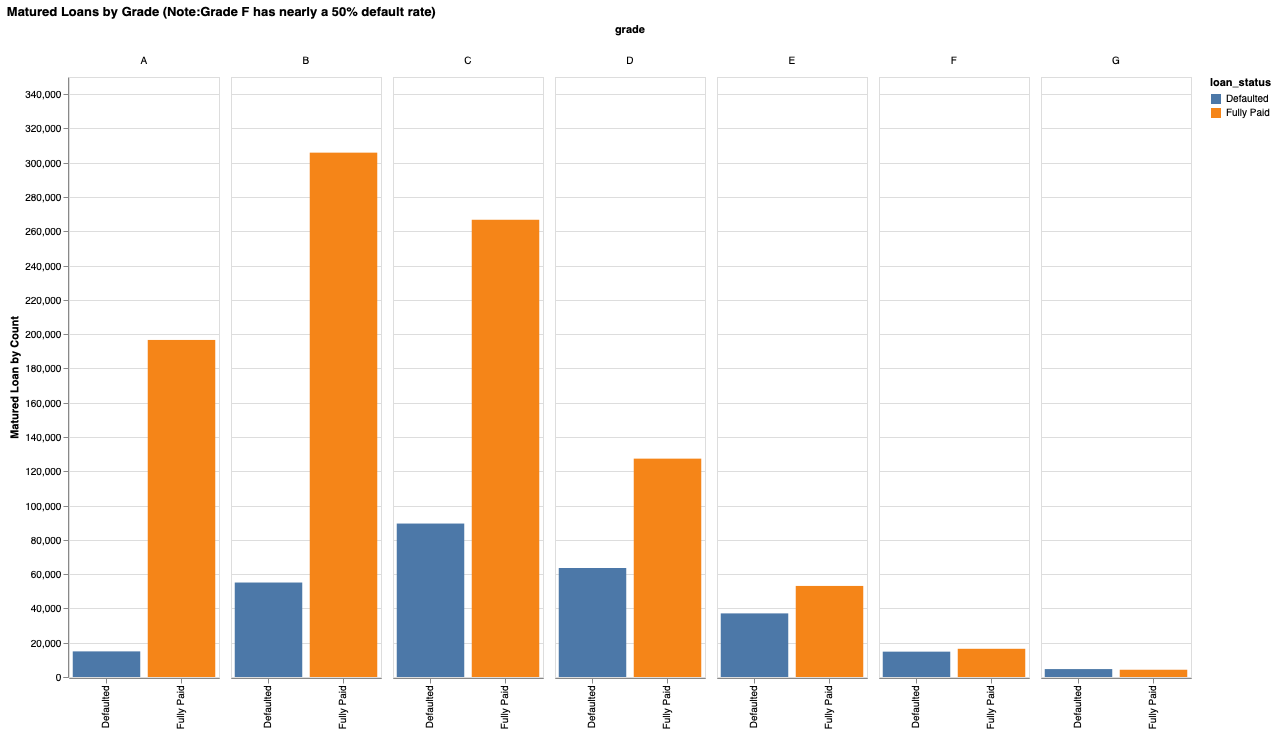

In [46]:
chart_data_default = eda_group_data.groupby(['grade', 'loan_status'
                                            ])['loan_status_count',
                                               'funded_amnt',
                                                    ].agg({ 'funded_amnt':'sum',
                                                            'loan_status_count':'count'
                                                          }).reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='loan_status',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='loan_status_count',type='quantitative',axis=alt.Axis(title='Matured Loan by Count')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'grade','funded_amnt:Q'],
).properties(width=150, height=600,title='Matured Loans by Grade (Note:Grade F has nearly a 50% default rate)')

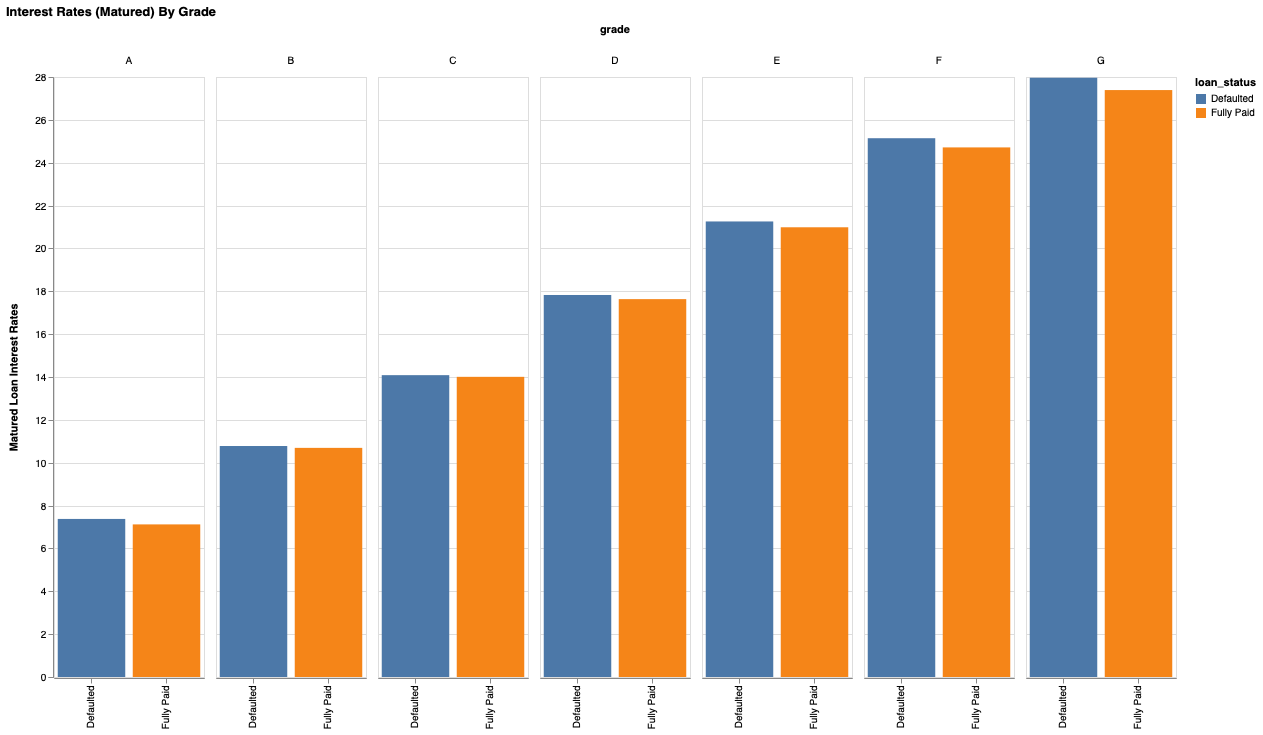

In [24]:
chart_data_default = eda_group_data.groupby(['grade', 'loan_status'
                                            ])['loan_status_count',
                                               'int_rate',
                                              ].agg({ 'loan_status_count':'count',
                                                      'int_rate':'mean'
                                                     }).reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='loan_status',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='int_rate',type='quantitative',axis=alt.Axis(title='Matured Loan Interest Rates')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'grade','int_rate:Q'],
).properties(width=150, height=600,title='Interest Rates (Matured) By Grade')

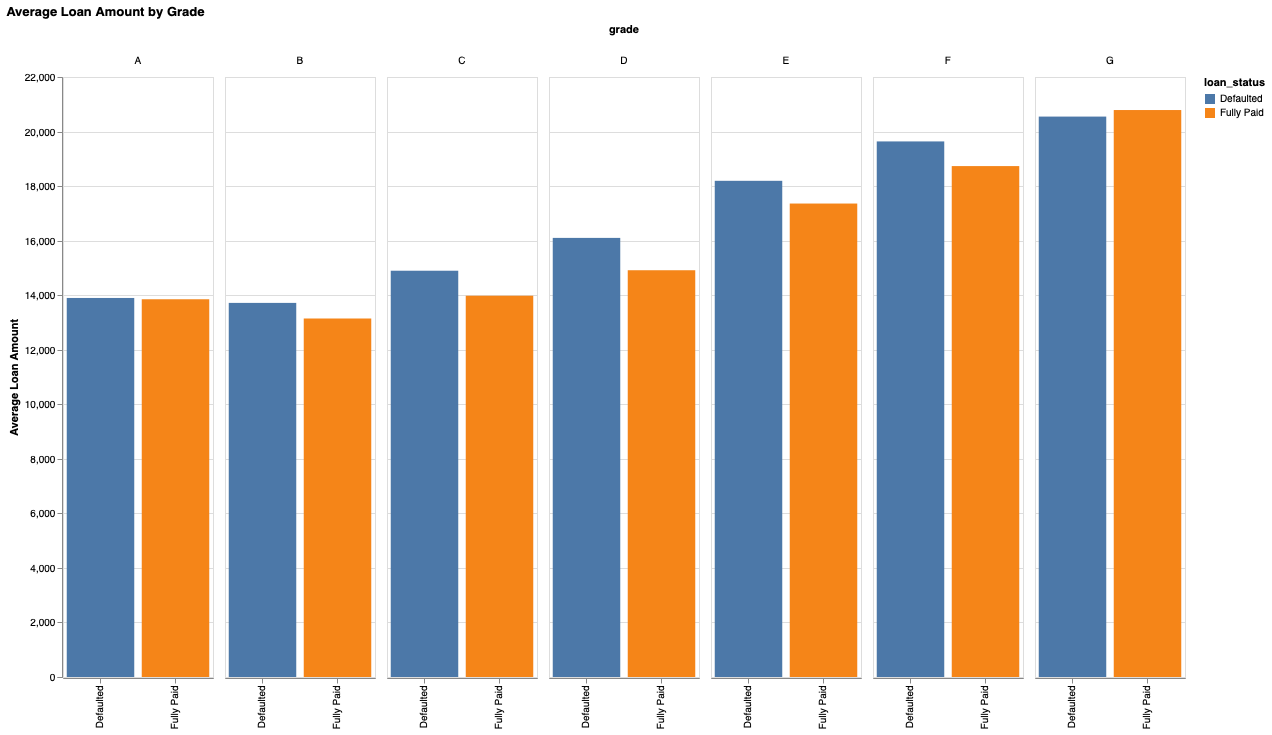

In [25]:
chart_data_default = eda_group_data.groupby(['grade', 'loan_status'])['funded_amnt'].mean().reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='loan_status',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='funded_amnt',type='quantitative',axis=alt.Axis(title='Average Loan Amount')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'funded_amnt'],
).properties(width=150, height=600,title='Average Loan Amount by Grade')

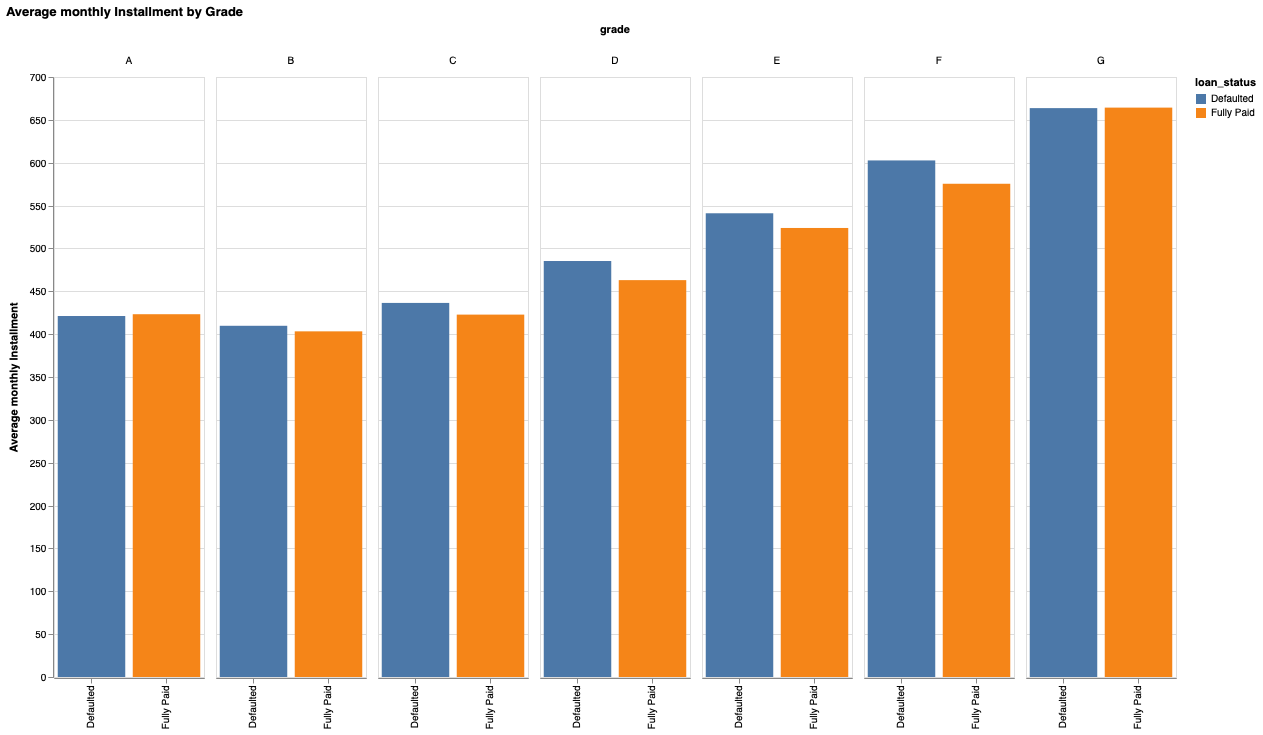

In [26]:
chart_data_default = eda_group_data.groupby(['grade', 'loan_status'])['installment'].mean().reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='loan_status',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='installment',type='quantitative',axis=alt.Axis(title='Average monthly Installment')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'installment'],
).properties(width=150, height=600,title='Average monthly Installment by Grade')

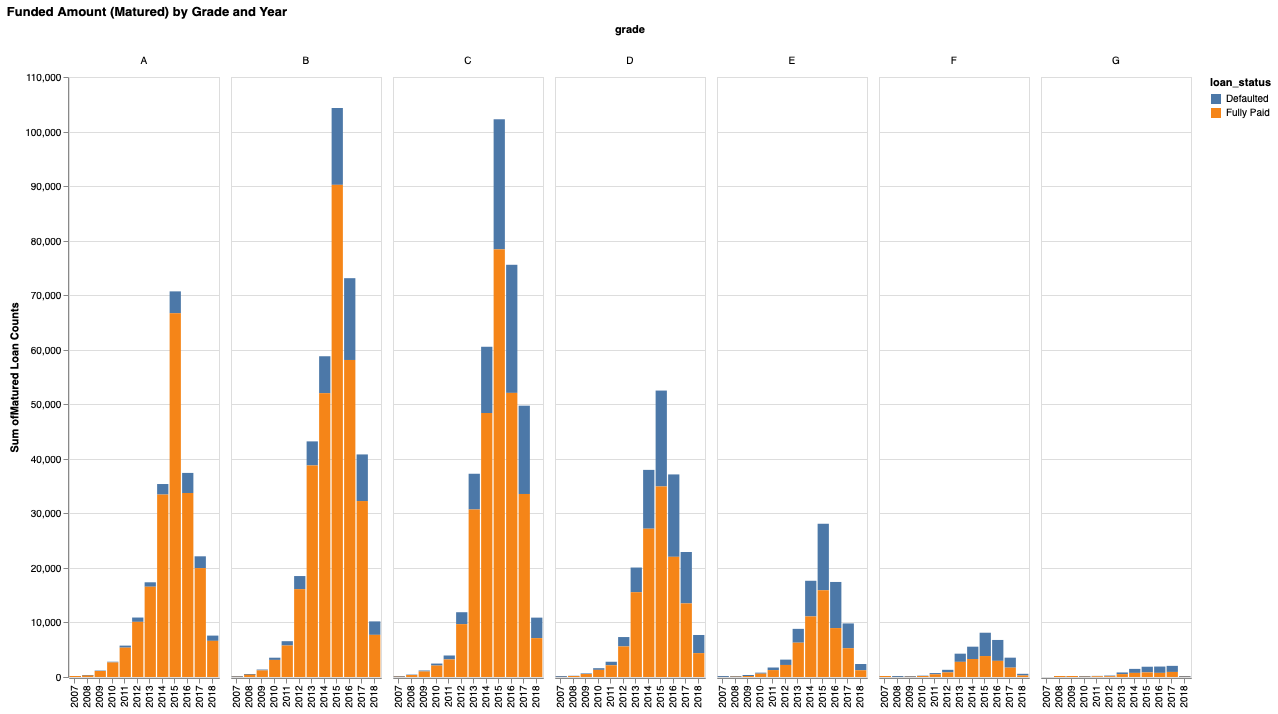

In [27]:
chart_data_default = eda_group_data.groupby(['grade', 'issue_date_year','loan_status'
                                            ])['loan_status_count',
                                               'int_rate',].agg({ 'int_rate':'mean',
                                                                  'loan_status_count':'count'
                                                                 }).reset_index()

map_default_status = {0:'Defaulted',1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='loan_status_count',type='quantitative',axis=alt.Axis(title='Sum ofMatured Loan Counts')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'grade','loan_status_count:Q'],
).properties(width=150, height=600,title='Funded Amount (Matured) by Grade and Year')

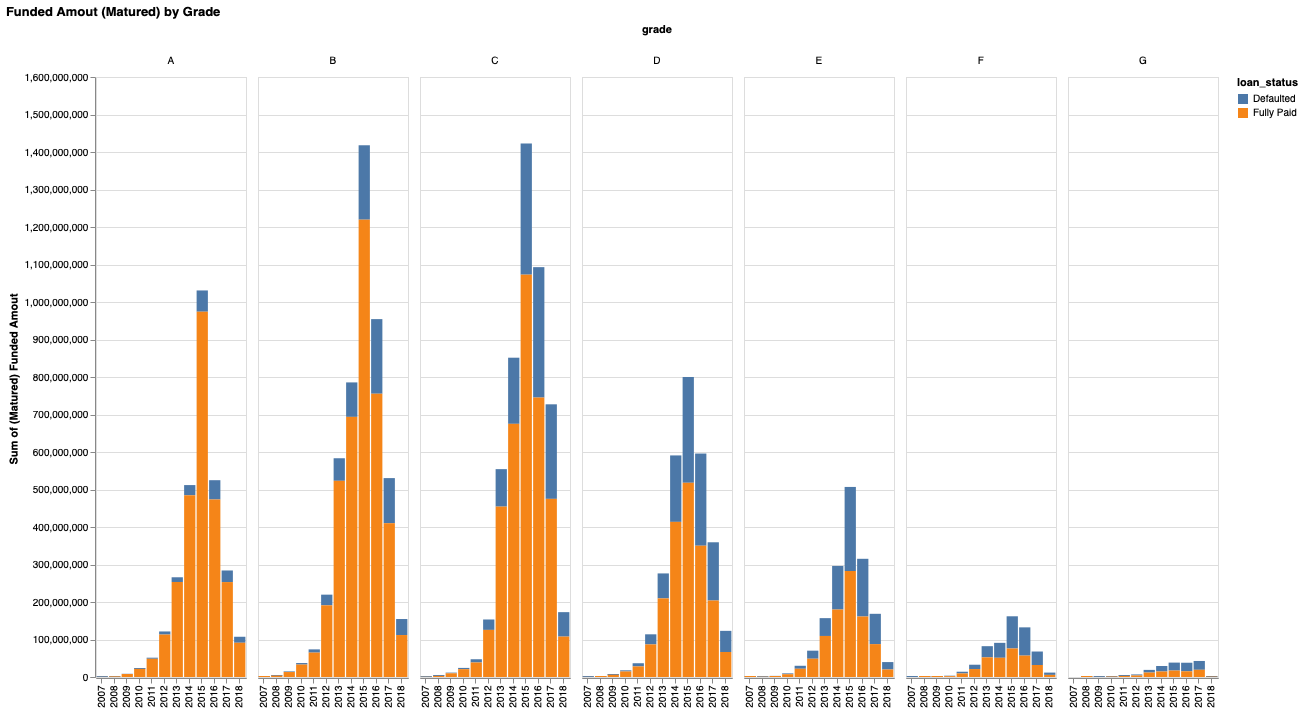

In [28]:
chart_data_default = eda_group_data.groupby(['grade', 'issue_date_year','loan_status'
                                            ])['loan_status_count','funded_amnt',
                                              ].agg({ 'funded_amnt':'sum', 
                                                      'loan_status_count':'count'
                                                    }).reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='funded_amnt',type='quantitative',axis=alt.Axis(title='Sum of (Matured) Funded Amout ')),
    color='loan_status:N',
    column = 'grade:N',
    tooltip=['loan_status:N', 'grade','funded_amnt:Q'],
).properties(width=150, height=600,title='Funded Amout (Matured) by Grade')

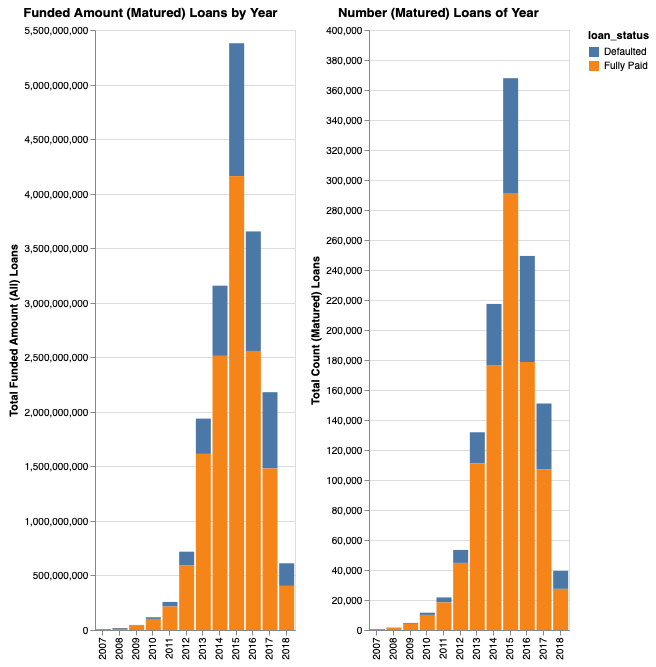

In [29]:
chart_data_default = eda_group_data.groupby(['issue_date_year','loan_status'
                                            ])['loan_status_count','funded_amnt',
                                              ].agg({ 'funded_amnt':'sum',
                                                      'loan_status_count':'count'
                                                    }).reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

chart_default_funded_amount_matured = alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='funded_amnt',type='quantitative',axis=alt.Axis(title='Total Funded Amount (All) Loans')),
    color='loan_status:N',
    tooltip=['loan_status:N','funded_amnt:Q'],
).properties(width=200, height=600,title='Funded Amount (Matured) Loans by Year')

chart_data_default = eda_group_data.groupby(['issue_date_year','loan_status'
                                            ])['loan_status_count',
                                               'funded_amnt'
                                              ].agg({ 'funded_amnt':'sum',
                                                      'loan_status_count':'count'
                                                     }).reset_index()

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

chart_default_counts_matured = alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='loan_status_count',type='quantitative',axis=alt.Axis(title='Total Count (Matured) Loans')),
    color='loan_status:N',
    tooltip=['loan_status:N','loan_status_count:Q'],
).properties(width=200, height=600,title='Number (Matured) Loans of Year')

chart_default_funded_amount_matured | chart_default_counts_matured

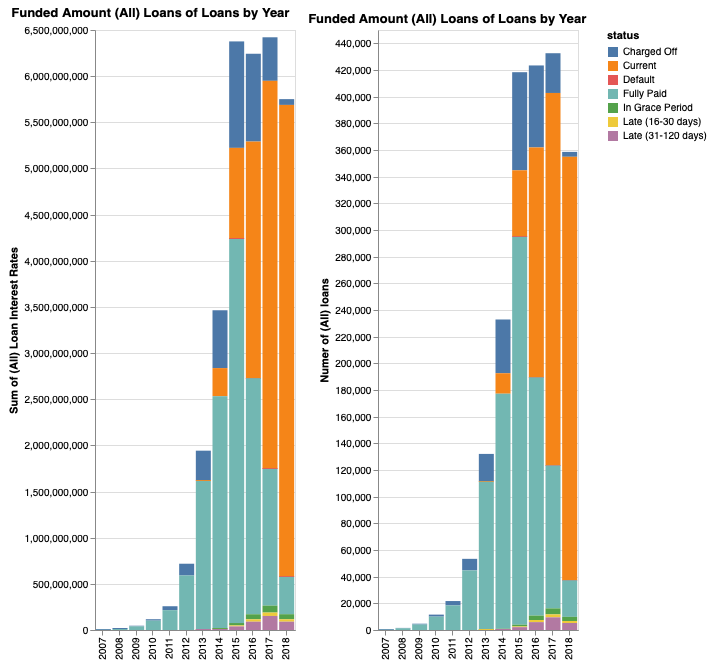

In [30]:
chart_data_default_all = eda_group_data.groupby(['issue_date_year','status'
                                                ])['id','funded_amnt',
                                                  ].agg({ 'funded_amnt':'sum',
                                                          'id':'count'
                                                        }).reset_index()

chart_default_funded_amount = alt.Chart(chart_data_default_all).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='funded_amnt',type='quantitative',axis=alt.Axis(title='Sum of (All) Loan Interest Rates')),
    color='status:N',
    tooltip=['status:N','funded_amnt:Q'],
).properties(width=200, height=600,title='Funded Amount (All) Loans of Loans by Year')

chart_default_count_amount = alt.Chart(chart_data_default_all).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='id',type='quantitative',axis=alt.Axis(title='Numer of (All) loans')),
    color='status:N',
    tooltip=['status:N','id:Q'],
).properties(width=200, height=600,title='Funded Amount (All) Loans of Loans by Year')

chart_default_funded_amount | chart_default_count_amount

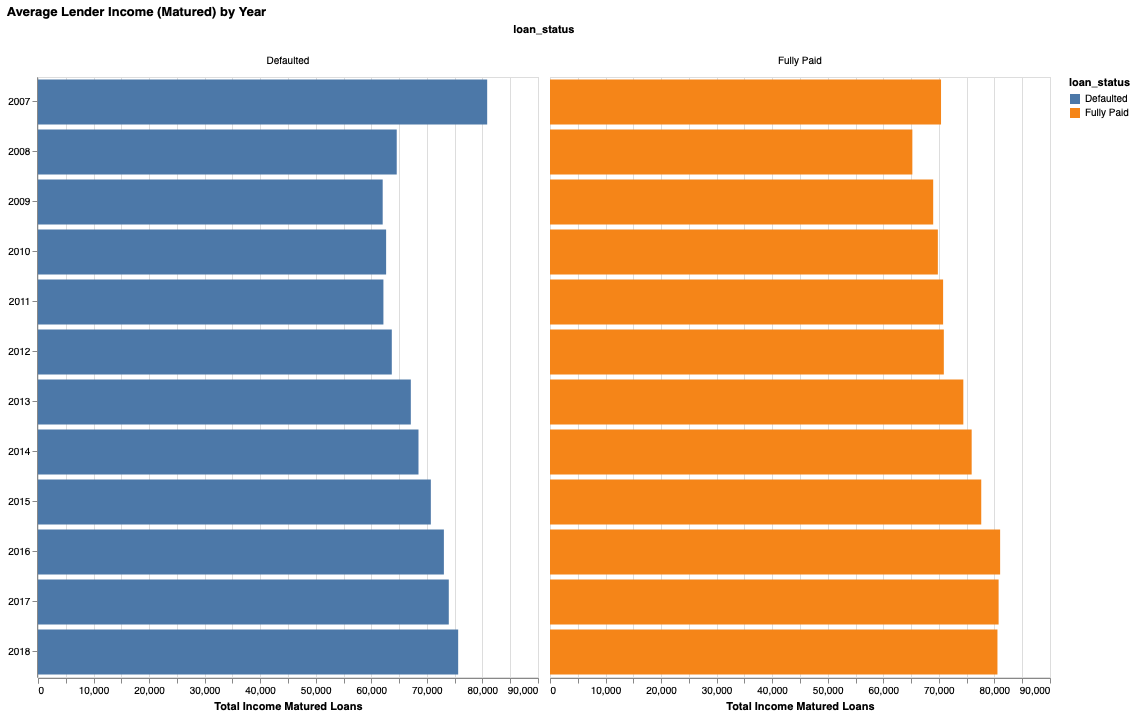

In [31]:
chart_data_default = eda_group_data.groupby(['issue_date_year','loan_status'])['annual_inc'].mean().reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    y=alt.Y(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    x=alt.X(field='annual_inc',type='quantitative',axis=alt.Axis(title='Total Income Matured Loans')),
    color='loan_status:N',
    tooltip=['loan_status:N','annual_inc:Q'],
    column = 'loan_status:N',
).properties(width=500, height=600,title='Average Lender Income (Matured) by Year ')

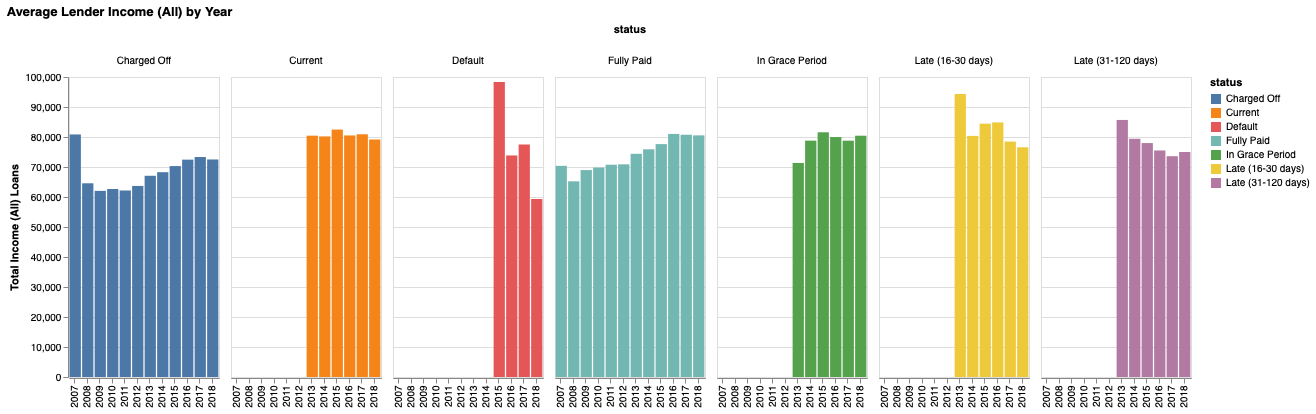

In [32]:
chart_data_default = eda_group_data.groupby(['issue_date_year','status'])['annual_inc'].mean().reset_index()

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='annual_inc',type='quantitative',axis=alt.Axis(title='Total Income (All) Loans')),
    color='status:N',
    tooltip=['status:N','annual_inc:Q'],
    column = 'status:N',
).properties(width=150, height=300,title='Average Lender Income (All) by Year ')

Lets take a look at incmoe across all loans. 

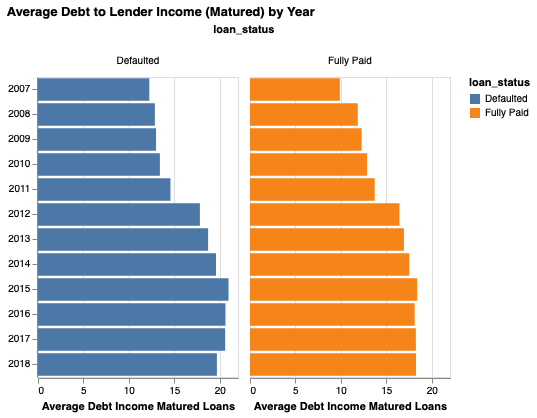

In [34]:
chart_data_default = eda_group_data.groupby(['issue_date_year','loan_status' ])['dti'].mean().reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    y=alt.Y(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    x=alt.X(field='dti',type='quantitative',axis=alt.Axis(title='Average Debt Income Matured Loans')),
    color='loan_status:N',
    tooltip=['loan_status:N','dti:Q'],
    column = 'loan_status:N',#'loan_status:N',
).properties(width=200, height=300,title='Average Debt to Lender Income (Matured) by Year ')


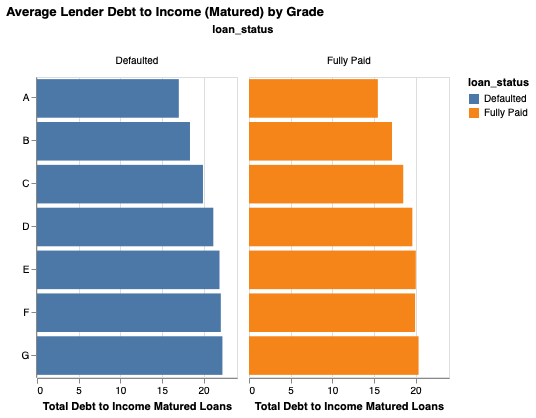

In [49]:
chart_data_default = eda_group_data.groupby(['grade','loan_status' ])['dti'].mean().reset_index()

map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    y=alt.Y(field='grade',type='nominal',axis=alt.Axis(title='')),
    x=alt.X(field='dti',type='quantitative',axis=alt.Axis(title='Total Debt to Income Matured Loans')),
    color='loan_status:N',
    tooltip=['loan_status:N','dti:Q'],
    column = 'loan_status:N',#'loan_status:N',
).properties(width=200, height=300,title='Average Lender Debt to Income (Matured) by Grade')

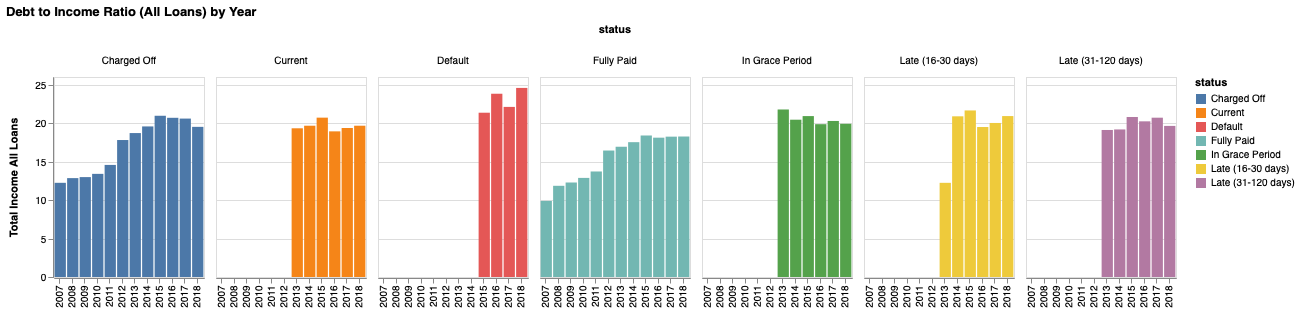

In [36]:
chart_data_default = eda_group_data.groupby(['issue_date_year','status' ])['dti'].mean().reset_index()

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='issue_date_year',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='dti',type='quantitative',axis=alt.Axis(title='Total Income All Loans')),
    color='status:N',
    tooltip=['status:N','dti:Q'],
    column = 'status:N',
).properties(width=150, height=200,title='Debt to Income Ratio (All Loans) by Year')


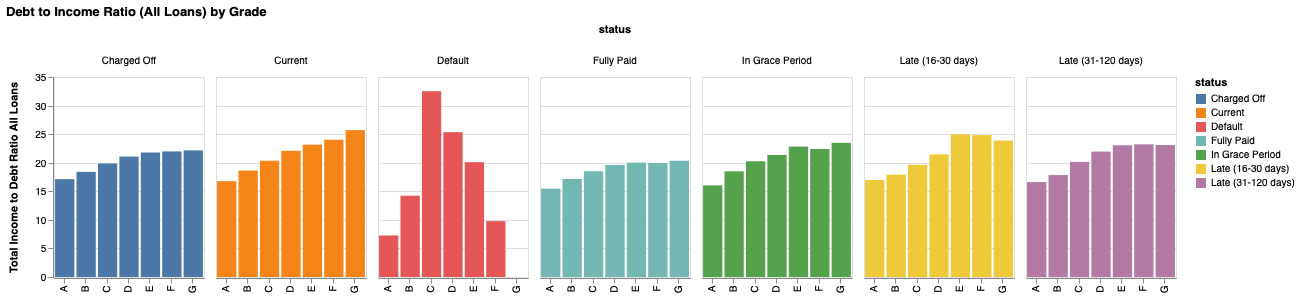

In [37]:
chart_data_default = eda_group_data.groupby(['grade','status' ])['dti'].mean().reset_index()

alt.Chart(chart_data_default).mark_bar().encode(
    x=alt.X(field='grade',type='nominal',axis=alt.Axis(title='')),
    y=alt.Y(field='dti',type='quantitative',axis=alt.Axis(title='Total Income to Debt Ratio All Loans')),
    color='status:N',
    tooltip=['status:N','dti:Q'],
    column = 'status:N',
).properties(width=150, height=200,title='Debt to Income Ratio (All Loans) by Grade')

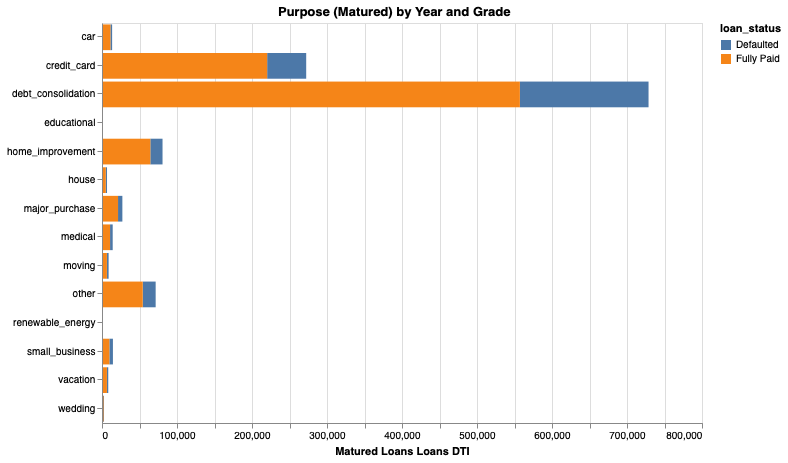

In [38]:
chart_data_default = eda_group_data.groupby(['purpose','loan_status'])['loan_status_count'].count().reset_index()
map_default_status = {0:'Defaulted', 1:'Fully Paid'}

chart_data_default['loan_status'] = chart_data_default['loan_status'].map(map_default_status)

alt.Chart(chart_data_default).mark_bar().encode(
    y=alt.Y(field='purpose',type='nominal',axis=alt.Axis(title='')),
    x=alt.X(field='loan_status_count',type='quantitative',axis=alt.Axis(title='Matured Loans Loans DTI')),
    color='loan_status:N',
    tooltip=['loan_status:N','annual_inc:Q']
).properties(width=600, height=400,title='Purpose (Matured) by Year and Grade')

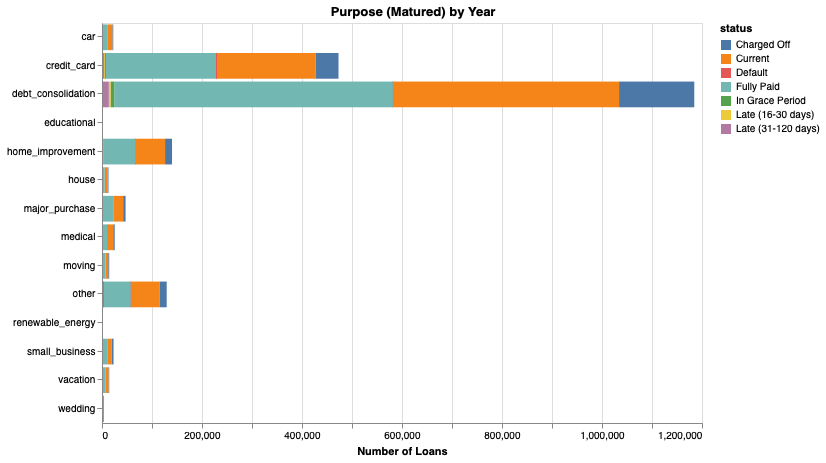

In [39]:
chart_data_default = eda_group_data.groupby(['purpose','status'])['id'].count().reset_index()

alt.Chart(chart_data_default).mark_bar().encode(
    y=alt.Y(field='purpose',type='nominal',axis=alt.Axis(title='')),
    x=alt.X(field='id',type='quantitative',axis=alt.Axis(title='Number of Loans')),
    color='status:N',
    tooltip=['status:N','id:Q'],
).properties(width=600, height=400,title='Purpose (Matured) by Year')

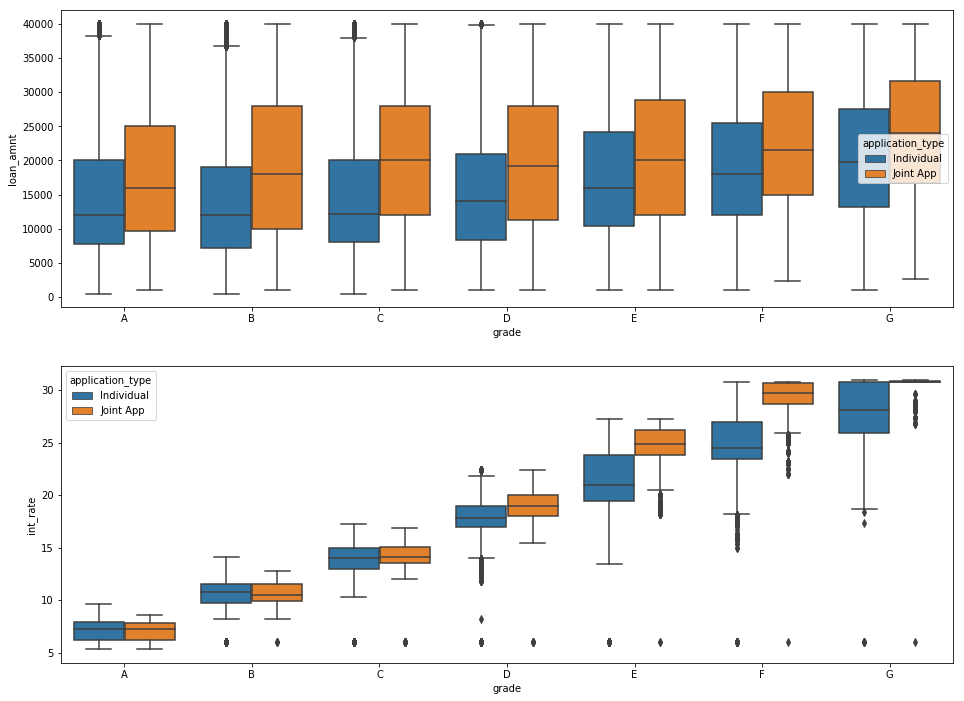

In [42]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

fig, ax = plt.subplots(2,1, figsize=(16,12))

sns.boxplot(x="grade", 
            y="loan_amnt", 
            data=lending_club_data,
            ax=ax[0], 
            hue="application_type", 
            order=["A",'B','C','D','E','F', 'G']
           )
sns.boxplot(x='grade', 
            y="int_rate",data=lending_club_data, 
            hue="application_type", 
            ax=ax[1], 
            order=["A",'B','C','D','E','F', 'G']
           )
plt.show()

### EDA: Conclusion:

The borrowers are diverse and it is difficult to pinpoint a single factor that contributes to a default. At a glance, determining whether a borrower will default is inconclusive. 